In [1]:
import os

import numpy as np
from skimage import util, transform, filters, color, measure, morphology
from sklearn import model_selection, neighbors, metrics, preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
ds_path = r"C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\mpeg7_mod"
print(ds_path)

C:\Users\besil\OneDrive\Desktop\Faculdade\Visao Computacional\mpeg7_mod\mpeg7_mod


In [3]:
classes_list = os.listdir(ds_path)
image_list, label_list, filename_list_ = [], [], []

for classe in classes_list:
    for filename in os.listdir(os.path.join(ds_path, classe)):
        img_temp = plt.imread(os.path.join(ds_path, classe, filename))
        resized_img = transform.resize(img_temp, (img_temp.shape[0] // 4, img_temp.shape[1] // 4), anti_aliasing=True)
        image_list.append(resized_img)
        label_list.append(classe)
        filename_list_.append(filename)

In [4]:
# Coverte para numpy array
label_list = np.array(label_list)
print(label_list)

['apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat'
 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat'
 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 'bat' 

In [5]:
image_list_temp, filename_list_temp = [], []

for i, class_name in enumerate(classes_list):
    indices = np.where(np.array(label_list) == class_name)[0][:6]
    image_list_temp.extend([image_list[j] for j in indices])
    filename_list_temp.extend([filename_list_[j] for j in indices])
print(i, class_name)



5 bone


In [6]:
for i, image in enumerate(image_list_temp):
    print(f"Imagem {i}: Mínimo = {image.min()}, Máximo = {image.max()}, Forma = {image.shape}")


Imagem 0: Mínimo = 0.0, Máximo = 1.0, Forma = (64, 64)
Imagem 1: Mínimo = 0.0, Máximo = 1.0, Forma = (64, 64)
Imagem 2: Mínimo = 0.0, Máximo = 1.0, Forma = (64, 64)
Imagem 3: Mínimo = 0.0, Máximo = 1.0, Forma = (64, 64)
Imagem 4: Mínimo = 0.0, Máximo = 1.0, Forma = (64, 64)
Imagem 5: Mínimo = 0.0, Máximo = 1.0, Forma = (64, 64)
Imagem 6: Mínimo = 0.0, Máximo = 1.0, Forma = (185, 86)
Imagem 7: Mínimo = 0.0, Máximo = 1.0, Forma = (185, 86)
Imagem 8: Mínimo = 0.0, Máximo = 1.0, Forma = (185, 86)
Imagem 9: Mínimo = 0.0, Máximo = 1.0, Forma = (185, 86)
Imagem 10: Mínimo = 0.0, Máximo = 1.0, Forma = (185, 86)
Imagem 11: Mínimo = 0.0, Máximo = 1.0, Forma = (197, 185)
Imagem 12: Mínimo = 0.0, Máximo = 1.0, Forma = (103, 104)
Imagem 13: Mínimo = 0.0, Máximo = 1.0, Forma = (103, 104)
Imagem 14: Mínimo = 0.0, Máximo = 1.0, Forma = (103, 104)
Imagem 15: Mínimo = 0.0, Máximo = 1.0, Forma = (103, 104)
Imagem 16: Mínimo = 0.0, Máximo = 1.0, Forma = (103, 104)
Imagem 17: Mínimo = 0.0, Máximo = 1.0, Fo

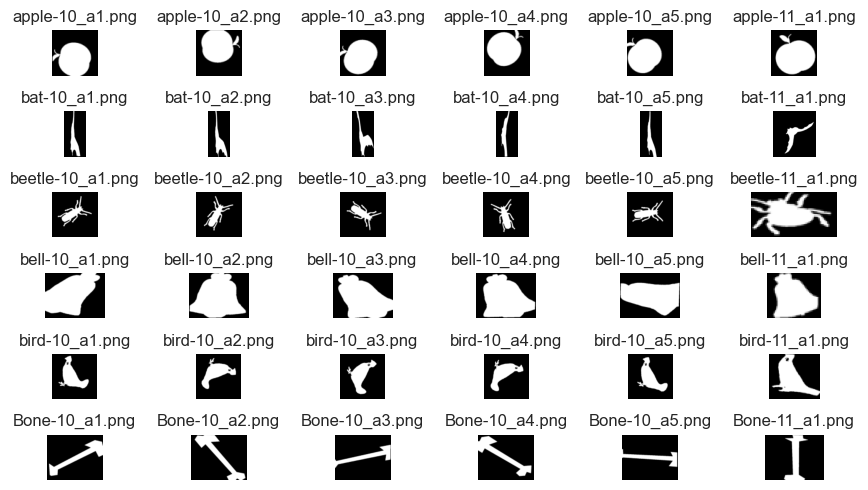

In [7]:
import matplotlib.pyplot as plt
import math
import numpy as np

num_images = len(image_list_temp)
rows, cols = math.ceil(num_images / 6), 6

fig, axes = plt.subplots(rows, cols, figsize=(9, 5))
axes = np.array(axes).reshape(rows, cols) if rows > 1 else np.expand_dims(axes, axis=0)

for idx, (image, filename) in enumerate(zip(image_list_temp, filename_list_temp)):
    row, col = divmod(idx, cols)
    img_to_display = (image * 255).astype('uint8') if image.max() <= 1 else image
    axes[row, col].imshow(img_to_display, cmap='gray', vmin=0, vmax=255)
    axes[row, col].set_title(str(filename))
    axes[row, col].axis('off')

for idx in range(num_images, rows * cols):
    row, col = divmod(idx, cols)
    fig.delaxes(axes[row, col])

fig.tight_layout()
plt.show()


In [8]:
# Arranjo 2D com as características das imagens
# Cada linha armazena informações sobre uma imagem. Cada coluna armazena uma característica.
# [ [area, major_axis, minor_axis, solidity, eccentricity] ]
feature_mat = []

# Lista com as imagens segmentadas (binárias)
seg_list = image_list  # Assumindo que image_list já contém as imagens segmentadas

# Lista com os rótulos das imagens
list_label = []

for i, (seg_image, label) in enumerate(zip(seg_list, label_list)):
    # DEBUG
    print('Imagem {} - classe {}'.format(i, label))
    
    # Adiciona o rótulo (label) da imagem à lista
    list_label.append(label)
    
    # Calcula a imagem de rótulos
    im_lbl = measure.label(seg_image)
    
    # Calcula uma lista de propriedades (características) dos objetos na imagem
    props = measure.regionprops(im_lbl)
    
    # Verifica se há exatamente um objeto na imagem
    if len(props) != 1:
        print(f'ERRO de segmentação: {len(props)} objetos detectados.')
        continue

    # Extrai as propriedades do objeto
    for prop in props:
        # Prop. 0: Área
        area = prop.area
        # Prop. 1: Maior eixo
        major_axis = prop.major_axis_length
        # Prop. 2: Menor eixo
        minor_axis = prop.minor_axis_length
        # Prop. 3: Solidez
        solidity = prop.solidity
        # Prop. 4: Excentricidade
        eccentricity = prop.eccentricity
        # Monta o vetor de características deste objeto.
        feature_list = [area, major_axis, minor_axis, solidity, eccentricity]
    
    # Adiciona as características desta imagem na matriz de características
    feature_mat.append(feature_list)


Imagem 0 - classe apple
ERRO de segmentação: 3 objetos detectados.
Imagem 1 - classe apple
ERRO de segmentação: 2 objetos detectados.
Imagem 2 - classe apple
ERRO de segmentação: 3 objetos detectados.
Imagem 3 - classe apple
ERRO de segmentação: 4 objetos detectados.
Imagem 4 - classe apple
ERRO de segmentação: 3 objetos detectados.
Imagem 5 - classe apple
ERRO de segmentação: 2 objetos detectados.
Imagem 6 - classe apple
ERRO de segmentação: 2 objetos detectados.
Imagem 7 - classe apple
ERRO de segmentação: 2 objetos detectados.
Imagem 8 - classe apple
ERRO de segmentação: 2 objetos detectados.
Imagem 9 - classe apple
ERRO de segmentação: 2 objetos detectados.
Imagem 10 - classe apple
Imagem 11 - classe apple
Imagem 12 - classe apple
Imagem 13 - classe apple
Imagem 14 - classe apple
Imagem 15 - classe apple
ERRO de segmentação: 2 objetos detectados.
Imagem 16 - classe apple
ERRO de segmentação: 2 objetos detectados.
Imagem 17 - classe apple
ERRO de segmentação: 2 objetos detectados.
I

In [9]:
feature_map = np.array(feature_mat)
with np.printoptions(precision=4, suppress=True):
    print(feature_map.shape)

(413, 5)


In [10]:
with np.printoptions(precision=4, suppress=True):
    print(feature_map.min(0))
    print(feature_map.max(0))
    print(feature_map.mean(0))
    print(feature_map.std(0))

[49.     10.6763  2.7537  0.1941  0.2828]
[5170.      201.0176   86.718     0.983     0.9997]
[1267.1719   84.4461   27.2976    0.6872    0.8709]
[1094.9587   48.4176   15.3707    0.2016    0.1576]


In [11]:
# Seleciona apenas as primeiras N imagens de cada classe
seg_list_temp = []
filename_list_temp = []

# Itera pelo número de classes
### for i in range(3):
for i, class_name in enumerate(classes_list):
    # As 6 primeiras ocorrencias em que label é igual a 'i'.
    seg_list_temp += [seg_list[j] for j in np.where(label_list==class_name)[0][:6]]
    filename_list_temp += [filename_list_[j] for j in np.where(label_list==class_name)[0][:6]]

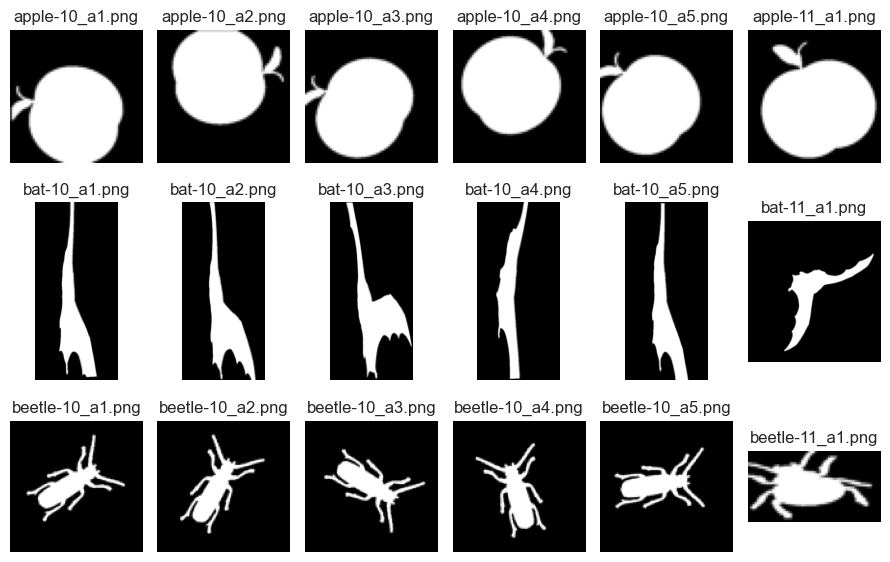

In [12]:
seg_list_temp = seg_list_temp[:18]
filename_list_temp = filename_list_temp[:18]

fig, ax  = plt.subplots(3, 6, figsize=(9, 6))

for i, (image, filename) in enumerate(zip(seg_list_temp, filename_list_temp)):
    ax[i // 6, i % 6].imshow(image, cmap='gray')
    ax[i // 6, i % 6].set_title(str(filename))
    ax[i // 6, i % 6].axis('off')

fig.tight_layout()
plt.show()


In [13]:
# Arranjo 2D para as características e lista de rótulos correspondentes
feature_mat = []
filtered_labels = []  # Para manter apenas os rótulos alinhados às características

for i, (seg_image, label) in enumerate(zip(seg_list, label_list)):
    # Calcula a imagem de rótulos
    im_lbl = measure.label(seg_image)
    
    # Calcula uma lista de propriedades (características) dos objetos na imagem
    props = measure.regionprops(im_lbl)
    
    # Verifica se há exatamente um objeto na imagem
    if len(props) != 1:
        print(f'Imagem {i} - ERRO de segmentação: {len(props)} objetos detectados.')
        continue  # Ignora imagens com problemas de segmentação

    # Extrai as propriedades do objeto
    for prop in props:
        # Prop. 0: Área
        area = prop.area
        # Prop. 1: Maior eixo
        major_axis = prop.major_axis_length
        # Prop. 2: Menor eixo
        minor_axis = prop.minor_axis_length
        # Prop. 3: Solidez
        solidity = prop.solidity
        # Prop. 4: Excentricidade
        eccentricity = prop.eccentricity
        # Monta o vetor de características deste objeto
        feature_list = [area, major_axis, minor_axis, solidity, eccentricity]
    
    # Adiciona as características à matriz e o rótulo correspondente
    feature_mat.append(feature_list)
    filtered_labels.append(label)

# Criar o DataFrame
features = ['area', 'major_axis', 'minor_axis', 'solidity', 'eccentricity']
df = pd.DataFrame(feature_mat, columns=features)
df['class'] = filtered_labels

# Exibir o DataFrame
display(df)



Imagem 0 - ERRO de segmentação: 3 objetos detectados.
Imagem 1 - ERRO de segmentação: 2 objetos detectados.
Imagem 2 - ERRO de segmentação: 3 objetos detectados.
Imagem 3 - ERRO de segmentação: 4 objetos detectados.
Imagem 4 - ERRO de segmentação: 3 objetos detectados.
Imagem 5 - ERRO de segmentação: 2 objetos detectados.
Imagem 6 - ERRO de segmentação: 2 objetos detectados.
Imagem 7 - ERRO de segmentação: 2 objetos detectados.
Imagem 8 - ERRO de segmentação: 2 objetos detectados.
Imagem 9 - ERRO de segmentação: 2 objetos detectados.
Imagem 15 - ERRO de segmentação: 2 objetos detectados.
Imagem 16 - ERRO de segmentação: 2 objetos detectados.
Imagem 17 - ERRO de segmentação: 2 objetos detectados.
Imagem 18 - ERRO de segmentação: 2 objetos detectados.
Imagem 19 - ERRO de segmentação: 2 objetos detectados.
Imagem 20 - ERRO de segmentação: 2 objetos detectados.
Imagem 21 - ERRO de segmentação: 2 objetos detectados.
Imagem 22 - ERRO de segmentação: 2 objetos detectados.
Imagem 23 - ERRO de 

,area,major_axis,minor_axis,solidity,eccentricity,class
0,1789.0,52.178028,44.473707,0.911360,0.522979,apple
1,1756.0,49.418813,46.022550,0.915060,0.364315,apple
2,1798.0,51.921729,44.958187,0.912690,0.500245,apple
3,1762.0,53.254111,42.720270,0.917708,0.597060,apple
4,1738.0,48.481813,46.502838,0.909471,0.282793,apple
...,...,...,...,...,...,...
408,1022.0,130.147253,25.402920,0.333769,0.980766,bone
409,817.0,149.832754,18.182537,0.314352,0.992610,bone
410,986.0,120.140664,25.523218,0.326815,0.977173,bone
411,969.0,125.362114,24.930657,0.324406,0.980026,bone


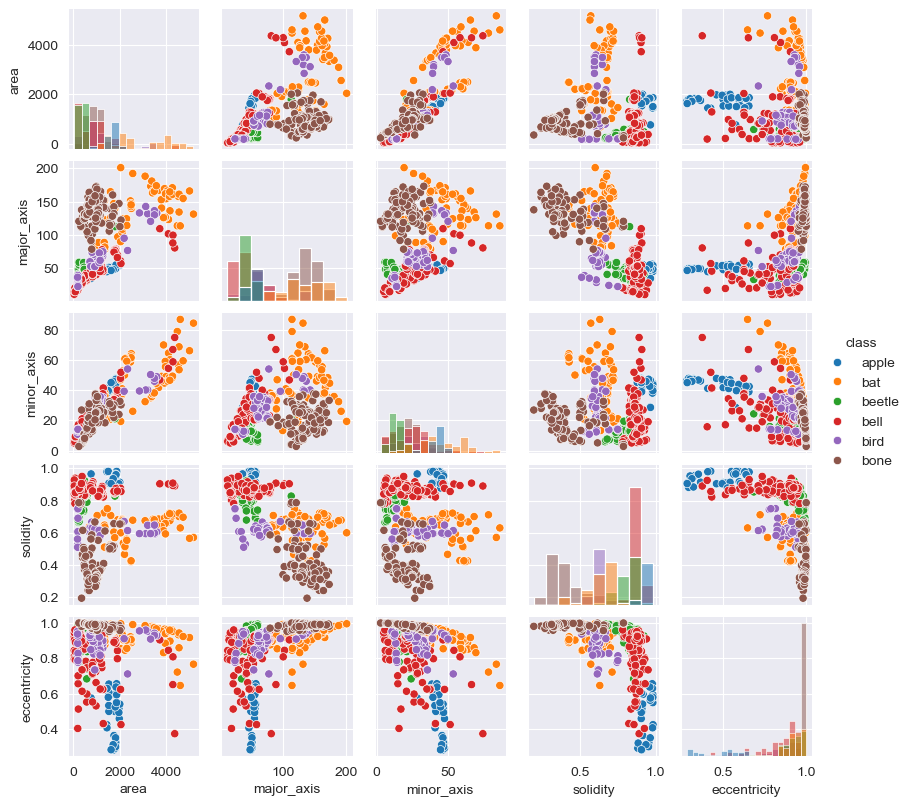

In [14]:
g = sns.PairGrid(df, hue='class', vars=features)
g.fig.set_size_inches(8, 8)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [15]:
print(f"Feature Matrix Rows: {len(feature_mat)}, Labels: {len(filtered_labels)}")


Feature Matrix Rows: 413, Labels: 413


In [16]:
import numpy as np

# Converte feature_mat para um array NumPy e seleciona as duas primeiras características
feature_mat_ok = np.array(feature_mat)[:, :2]

# Exibe as características selecionadas
print(feature_mat_ok)


[[1789.           52.17802795]
 [1756.           49.41881258]
 [1798.           51.92172857]
 [1762.           53.2541114 ]
 [1738.           48.48181331]
 [1537.           48.09204783]
 [1532.           48.48080869]
 [1542.           50.22012304]
 [1538.           51.45051381]
 [1968.           54.63593932]
 [1983.           53.77324933]
 [2006.           55.64996189]
 [1966.           54.16376797]
 [1810.           52.92029505]
 [1811.           49.91330291]
 [1815.           50.21860947]
 [1865.           53.33663008]
 [1869.           56.20472337]
 [1871.           54.43978352]
 [1447.           45.12354016]
 [1459.           48.94217043]
 [1454.           45.03180817]
 [1510.           48.59721647]
 [1833.           49.76842233]
 [1831.           49.71996908]
 [1824.           49.83223695]
 [1825.           49.44836033]
 [1843.           55.25286142]
 [ 784.           34.92288902]
 [ 772.           34.8843417 ]
 [1721.           48.15833233]
 [1632.           46.85571838]
 [2209. 

In [17]:
# 30% das imagens vão para o conjunto de testes.
X_train, X_test, y_train, y_test = model_selection.train_test_split(feature_mat_ok, 
                                                                    filtered_labels, 
                                                                    test_size=0.3, 
                                                                    random_state=42)

In [18]:
# Média das caracteristicas do conjunto de treinamento
X_train_mean = X_train.mean(0)
# Desvio padrão das caracteristicas do conjunto de treinamento
X_train_std = X_train.std(0)

with np.printoptions(precision=4, suppress=True):
    print(X_train.mean(0))
    print(X_train.std(0))

[1235.3356   81.5548]
[1061.8517   47.1919]


In [19]:
# Transformada Normal de Caracteristicas
X_train_norm = (X_train - X_train_mean) / X_train_std
X_test_norm = (X_test - X_train_mean) / X_train_std

with np.printoptions(precision=4, suppress=True):
    print(X_train_norm.mean(0))
    print(X_test_norm.mean(0))

[0. 0.]
[0.0999 0.2041]


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Lista de valores de k
k_values = [3, 5, 7, 9, 11, 13, 15]

# Dicionário para armazenar os resultados
results = {}

for k in k_values:
    # Constrói o classificador K-NN
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Treinando o classificador
    clf.fit(X_train_norm, y_train)
    
    # Testando o classificador
    pred = clf.predict(X_test_norm)
    
    # Calcula a acurácia
    acc = accuracy_score(y_test, pred)
    
    # Armazena os resultados
    results[k] = acc
    print(f'K={k}, Acurácia={acc:.4f}')


K=3, Acurácia=0.8468
K=5, Acurácia=0.8145
K=7, Acurácia=0.7984
K=9, Acurácia=0.8306
K=11, Acurácia=0.8145
K=13, Acurácia=0.8145
K=15, Acurácia=0.8145


In [21]:
import pandas as pd

# Ordena os resultados pelo valor da acurácia e seleciona os três melhores
top_k = sorted(results.items(), key=lambda x: x[1], reverse=True)[:3]

# Lista para armazenar os resultados dos três melhores
top_results = []

for k, acc in top_k:
    # Constrói o classificador K-NN novamente para obter as previsões
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_norm, y_train)
    pred = clf.predict(X_test_norm)
    
    # Calcula os acertos
    acertos = (y_test == pred).astype(int)  # 1 para acertos, 0 para erros
    
    # Armazena os resultados para cada K
    for idx, (real, predicted, correct) in enumerate(zip(y_test, pred, acertos)):
        top_results.append({
            'K': k,
            'Index': idx,
            'Real': real,
            'Predição': predicted,
            'Acerto (1=Sim, 0=Não)': correct
        })

# Converte os resultados para um DataFrame
top_results_df = pd.DataFrame(top_results)

# Exibe os resultados diretamente
print(top_results_df)


     K  Index   Real Predição  Acerto (1=Sim, 0=Não)
0    3      0   bone     bone                      1
1    3      1   bone     bone                      1
2    3      2   bone     bone                      1
3    3      3   bone     bone                      1
4    3      4   bell     bell                      1
..  ..    ...    ...      ...                    ...
367  5    119   bone     bone                      1
368  5    120   bell     bell                      1
369  5    121  apple    apple                      1
370  5    122    bat      bat                      1
371  5    123   bell     bell                      1

[372 rows x 5 columns]


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# Itera pelos três melhores valores de K
for k, acc in top_k:
    # Constrói o classificador K-NN
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_norm, y_train)
    pred = clf.predict(X_test_norm)
    
    # Exibe os resultados para cada K
    print(f'\nResultados para K={k} (Acurácia: {acc:.4f}):')
    
    # Matriz de Confusão
    print('\nMatriz de Confusão:')
    print(confusion_matrix(y_test, pred))
    
    # Relatório de Classificação
    print('\nRelatório de Classificação:')
    print(classification_report(y_test, pred))



Resultados para K=3 (Acurácia: 0.8468):

Matriz de Confusão:
[[13  0  0  1  0  0]
 [ 0 20  0  1  1  2]
 [ 0  0 14  2  1  0]
 [ 1  0  2 16  0  0]
 [ 0  1  0  6  9  0]
 [ 0  1  0  0  0 33]]

Relatório de Classificação:
              precision    recall  f1-score   support

       apple       0.93      0.93      0.93        14
         bat       0.91      0.83      0.87        24
      beetle       0.88      0.82      0.85        17
        bell       0.62      0.84      0.71        19
        bird       0.82      0.56      0.67        16
        bone       0.94      0.97      0.96        34

    accuracy                           0.85       124
   macro avg       0.85      0.83      0.83       124
weighted avg       0.86      0.85      0.85       124


Resultados para K=9 (Acurácia: 0.8306):

Matriz de Confusão:
[[13  0  0  1  0  0]
 [ 0 19  0  1  1  3]
 [ 0  0 14  3  0  0]
 [ 1  0  3 15  0  0]
 [ 0  1  3  3  9  0]
 [ 0  0  0  0  1 33]]

Relatório de Classificação:
              precisi

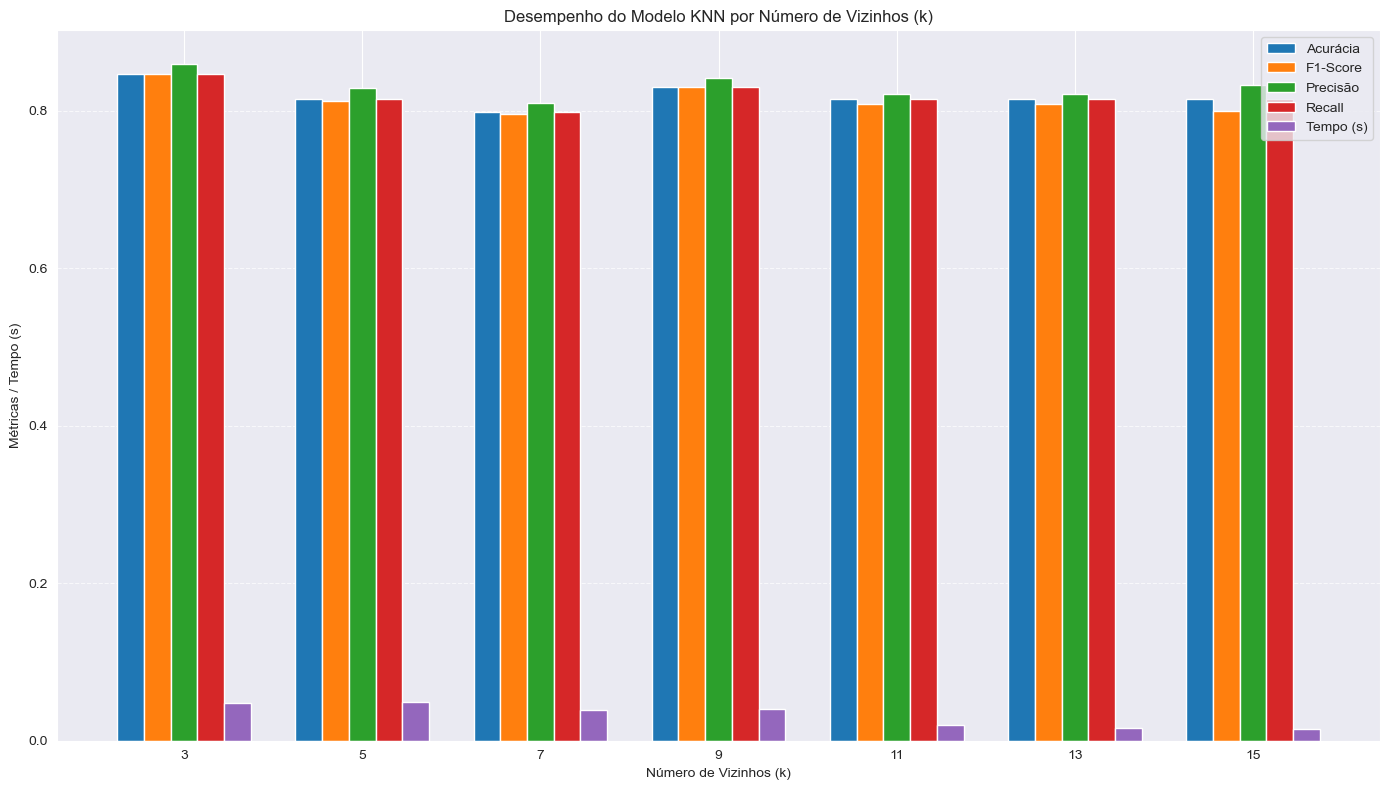

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import time

# Listas para armazenar os valores
k_values = sorted(results.keys())
accuracies = []
f1_scores = []
precisions = []
recalls = []
times = []

# Calcula métricas e tempo para cada valor de k
for k in k_values:
    start_time = time.time()
    
    # Treina e testa o modelo
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_norm, y_train)
    pred = clf.predict(X_test_norm)
    
    # Calcula métricas
    accuracies.append(accuracy_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred, average='weighted'))
    precisions.append(precision_score(y_test, pred, average='weighted'))
    recalls.append(recall_score(y_test, pred, average='weighted'))
    
    # Calcula tempo de execução
    times.append(time.time() - start_time)

# Configuração do gráfico de barras
x = np.arange(len(k_values))  # Posições no eixo X
width = 0.15  # Largura das barras

# Gráfico
plt.figure(figsize=(14, 8))

# Barras para cada métrica
plt.bar(x - 2*width, accuracies, width, label='Acurácia')
plt.bar(x - width, f1_scores, width, label='F1-Score')
plt.bar(x, precisions, width, label='Precisão')
plt.bar(x + width, recalls, width, label='Recall')
plt.bar(x + 2*width, times, width, label='Tempo (s)')

# Personalização
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Métricas / Tempo (s)')
plt.title('Desempenho do Modelo KNN por Número de Vizinhos (k)')
plt.xticks(x, k_values)  # Define os rótulos do eixo X como os valores de k
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Exibição do gráfico
plt.show()
